In [1]:
%matplotlib widget

In [2]:
from SatelliteModel import Satellite,Event
from SwarmModel import Swarm
from AsteroidModel import Asteroid,AsteroidField
from GroundStationModel import GroundStation
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import imageio.v2 as imageio
from OrbitalElements import Orbit,Rotation
import os
import sys
im_path = "D:/Anshu/College/Masters/Aalto/Master_Thesis/Aalto/Thesis_Files/Images/"

In [3]:
sat1 = Satellite(1,np.array([0,0,0]))
sat2 = Satellite(2,np.array([0,0,0]))

In [4]:
sat1.Position = np.array([5,5,5])
initPos = np.array([0,0,0])
sat1.InitializePosition(initPos)
def VelocityFunction(t):
    x = t
    y = math.sqrt(t)*2 if t < 4000 else t**1
    z = 1
    return np.array([x,y,z])
#ax,fig = sat1.PlotPath(velocityFunction=VelocityFunction)

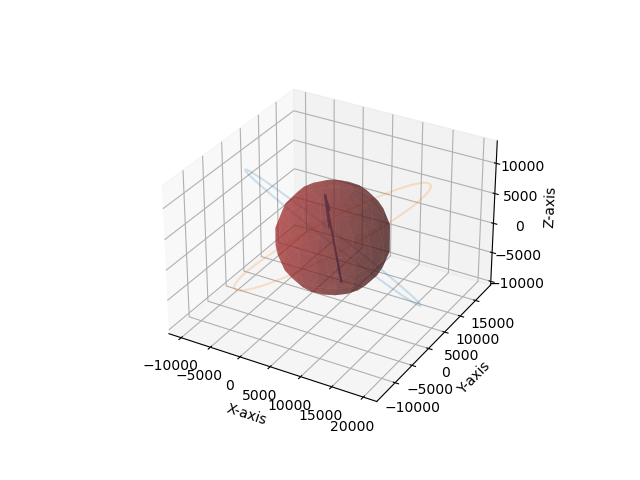

In [5]:
Eros = Asteroid(8420,6.687*(10**15),position=np.array([5000,2400,1500]),axis=np.array([-1.5,2,0.4]),period=316.2)
r1 = Rotation('x',45)
r2 = Rotation('z',30)
r3 = Rotation('x',15)
r4 = Rotation('y',45)
R1 = [r1,r2]
R2 = [r3,r4]
sat1.DefineOrbit(Orbit(Eros.GeoRadius,Rotations=R1))
sat2.DefineOrbit(Orbit(Eros.GeoRadius,Rotations=R2))
ax,fig = Eros.PlotAsteroid(PlotAxis=True)
#Xn1,Yn1,Zn1,X1,Y1,Z1,mat11,mat21 = Eros.PlotSatelliteOrbit(sat1,ax,fig,debug=True)
#print(Xn1.shape,Yn1.shape,Zn1.shape,X1.shape,Y1.shape,Z1.shape,mat11.shape,mat21.shape,sep="\n")
ax,fig = Eros.PlotSatelliteOrbit(sat1,ax,fig)
ax,fig = Eros.PlotSatelliteOrbit(sat2,ax,fig)

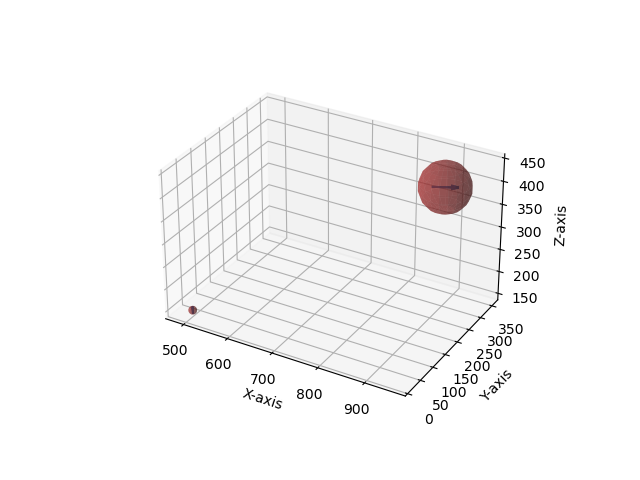

In [6]:
Eros = Asteroid(8420,6.687*(10**15),position=np.array([500,24,150]),axis=np.array([-1.5,2,0.4]),period=316.2)
Vesta = Asteroid(52500,2.59*(10**20),position=np.array([900,300,400]),axis=np.array([2.4,1.2,0]),period=320.4)
AField = AsteroidField([Eros,Vesta])
ax,fig,data = AField.PlotAsteroidField(PlotAxis=True)
ax,fig = Eros.PlotSatelliteOrbit(sat1,ax,fig)
ax,fig = Eros.PlotSatelliteOrbit(sat2,ax,fig)
if not os.path.isfile(im_path+"Afield.png"):
    plt.savefig(path+"AField.png")

In [7]:
if False:
    images = []
    for filename in range(1,362):
        images.append(imageio.imread(im_path + str(filename)+".png"))
    imageio.mimsave(path + 'movie.gif', images)

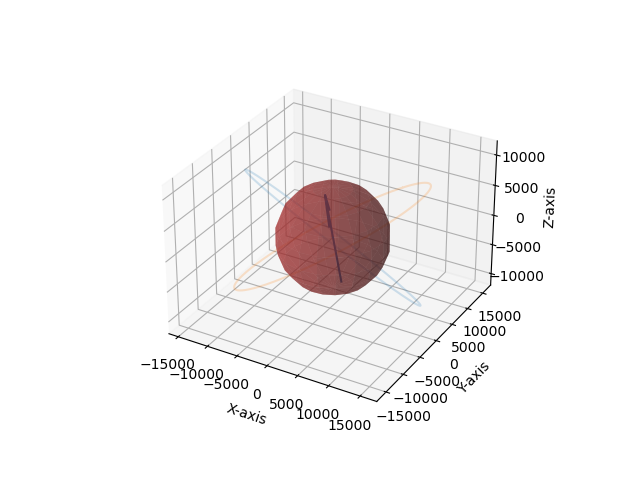

In [8]:
ax,fig = Eros.PlotAsteroid(PlotAxis=True)
ax,fig = Eros.PlotSatelliteOrbit(sat1,ax,fig)
ax,fig = Eros.PlotSatelliteOrbit(sat2,ax,fig)
s1_p = sat1.Orbit.GetOrbitValues()
s2_p = sat2.Orbit.GetOrbitValues()

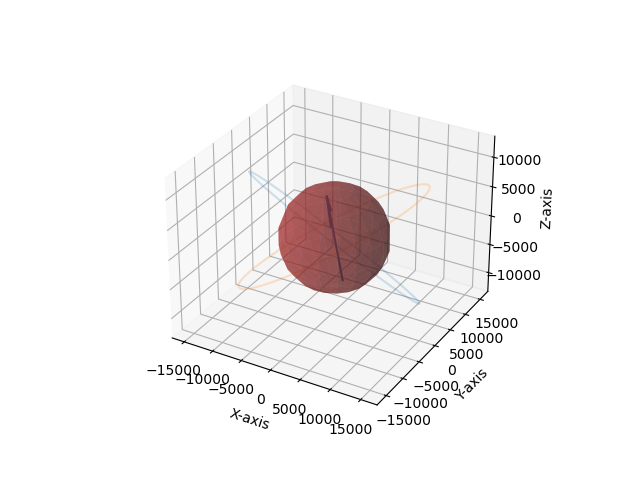

In [9]:
SAVE_IMG = False
for index in range(len(s1_p)):
    x_val = [s1_p[index][0],s2_p[index][0]]
    y_val = [s1_p[index][1],s2_p[index][1]]
    z_val = [s1_p[index][2],s2_p[index][2]]
    scat_plot = ax.scatter(x_val,y_val,z_val,marker='o',c=['black','blue'])
    ax.set_aspect('equal',anchor='C')
    if SAVE_IMG == True:
        plt.savefig(im_path+str(index)+".png")
    scat_plot.remove()
plt.show()

In [10]:
if False:
    images = []
    for filename in range(0,361):
        images.append(imageio.imread(im_path + str(filename)+".png"))
    imageio.mimsave(im_path + '2Sat1Ast.gif', images)

In [11]:
# Set the seed for random number generation used to generate various satellites and their parameters
rng = np.random.default_rng(1324) # default: 5412

In [12]:
# Generate a satellite swarm of SIZE with randomized initial positions within the interval (0.5 to 1 km)

SWARM_SIZE = 100
satelliteList = []
for num in range(SWARM_SIZE):
    xPos = 0.5*(1 + round(rng.random(),3))
    yPos = 0.5*(1 + round(rng.random(),3))
    zPos = 0.5*(1 + round(rng.random(),3))
    satellite = Satellite(num,np.array([xPos,yPos,zPos],dtype=object))
    satelliteList.append(satellite)

In [13]:
# Assign this generated list of satellites to it's own swarm
SatSwarm = Swarm(satelliteList)

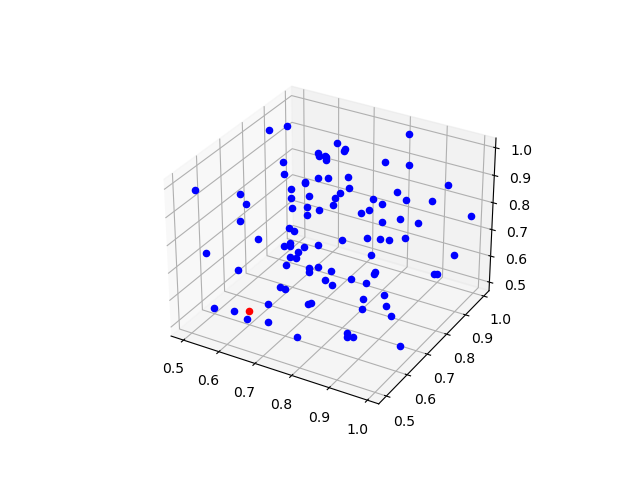

In [14]:
ax,fig = SatSwarm.PlotCurrentPosition()

In [15]:
# Generate random orbits for each of the satellites except the leader, to have a defined satellite
for satellite in SatSwarm.Members:
    #if satellite != SatSwarm.Leader:
    if satellite != SatSwarm.Leader:
        rotation1 = Rotation('x',rng.integers(-45,45,1))
        rotation2 = Rotation('y',rng.integers(-45,45,1))
        orbital_radius = int(Eros.GeoRadius + rng.integers(-400,800,1))
    else:
        rotation1 = Rotation('x',rng.integers(0,1,1))
        rotation2 = Rotation('y',rng.integers(0,1,1))
        orbital_radius = int(Eros.GeoRadius*2.5 + rng.integers(0,1,1))
            
    rotations = [rotation1,rotation2]
    orbit = Orbit(radius = orbital_radius,Rotations=rotations)
    satellite.DefineOrbit(orbit)
    satellite.Orbit.ShiftOrbit(n=int(rng.integers(-180,180,1)))

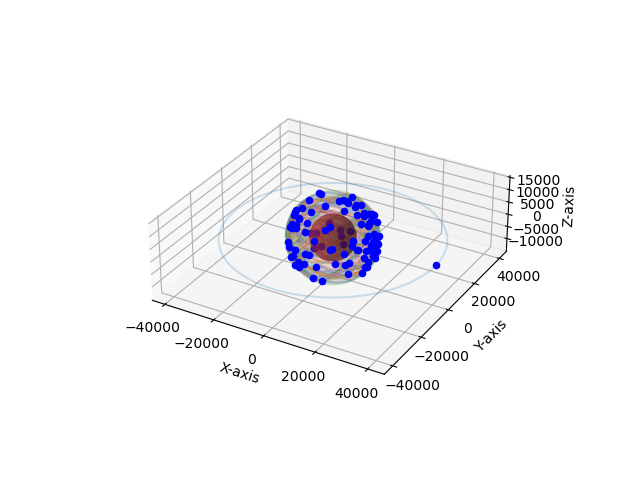

In [16]:
ax,fig = Eros.PlotAsteroid(PlotAxis=False)
for satellite in SatSwarm.Members:
    ax,fig = Eros.PlotSatelliteOrbit(satellite,ax,fig,PlotInitialPosition=True)

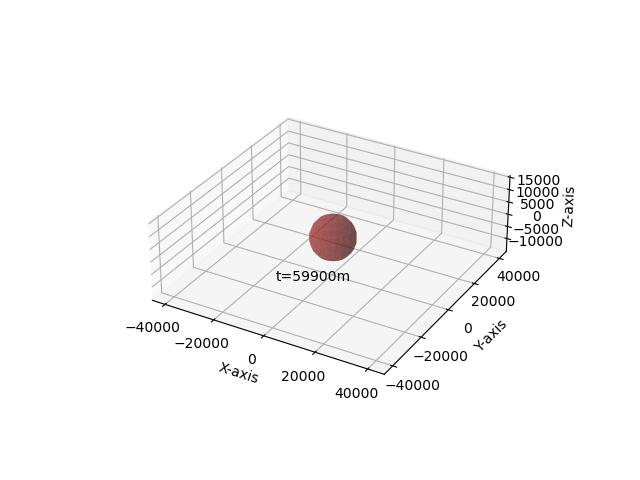

In [17]:
SAVE_IMG = False
ax,fig = Eros.PlotAsteroid(PlotAxis=False)
X0 = Eros.Position[0]
Y0 = Eros.Position[1]
Z0 = Eros.Position[2]
count=0
colors1 = ['blue' for i in range(100)]
colors1[0] = 'red'
colors2 = ['yellow' for i in range(100)]
colors2[0] = 'orange'
colors = [colors1,colors2]
for satellite in SatSwarm.Members:
    #ax,fig = Eros.PlotSatelliteOrbit(satellite,ax,fig,PlotInitialPosition=False)
    pass
t="-0"
text = ax.text(-13000,-17000,-13000,f"{t=}m")
for t in range(0,60000,100):
    cmap = []
    X = []
    Y = []
    Z = []
    for satIndex,satellite in enumerate(SatSwarm.Members):
        OrbitValues = satellite.Orbit.GetOrbitValues()
        OrbitResolution = satellite.Orbit.PeriodResolution
        OrbitIndex = int(t/OrbitResolution)%360
        Xs = OrbitValues[OrbitIndex][0]
        Ys = OrbitValues[OrbitIndex][1]
        Zs = OrbitValues[OrbitIndex][2]
        X.append(Xs+X0)
        Y.append(Ys+Y0)
        Z.append(Zs+Z0)
        if OrbitIndex == 0:
            cmap.append(colors2[satIndex])
        else:
            cmap.append(colors1[satIndex])
    scat_plot = ax.scatter(X,Y,Z,marker='o',c=cmap)
    text.set_text(f"{t=}m")
    ax.set_aspect('equal',anchor='C')
    if SAVE_IMG == True:
        plt.savefig(im_path+str(count)+".png")
        count+=1
    scat_plot.remove()
plt.show()

In [18]:
# Probability distribution functions definitions
def TrueEventPDF(*args,**kwargs):
    return True
def FalseEventPDF(*args,**kwargs):
    return False

In [19]:
# Event definitions
alwaysTrueEvent = Event(Name="TRUE!",Priority=0.1,Threshold=0.5,PDF=TrueEventPDF)
alwaysFalseEvent = Event(Name="FALSE!",Priority=0.1,Threshold=0.5,PDF=FalseEventPDF)

In [20]:
def StandardTaskEventPDF(t,dt,k=0.98,MAX_TIME=100):
    '''Probability Distribution Function of the form:
        P(t) = k*(e^(-k*(-t+tmax))),
        Where:
        P(t) -> Probability of True event at time t
        t -> Time
        tmax -> Expected (maximum) time at which task is completed.
        k -> Factor
        At t = infinity (=tmax), P(t) = k. At t = 0, P(t) = 0'''
    #k = 0.98
    #MAX_TIME = 100
    retVal = k*(np.e**(-k*(-t+MAX_TIME)))
    if t > MAX_TIME:
        retVal = k
    return retVal

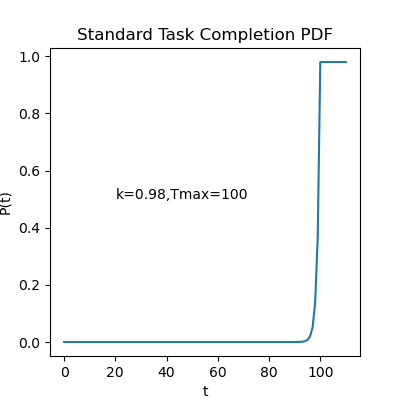

In [21]:
if True:
    x = []
    y = []
    for t in range(0,111,1):
        x.append(t)
        y.append(StandardTaskEventPDF(t,0))
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    ax.plot(x,y)
    plt.title("Standard Task Completion PDF")
    plt.xlabel('t')
    plt.ylabel('P(t)')
    plt.text(20,0.5,'k=0.98,Tmax=100')
    plt.show()

In [22]:
# Assign common events to swarm satellites
EventList = [alwaysTrueEvent,alwaysFalseEvent]
SatSwarm.AddCommonEvent(EventList)

# Assign satellite specific Standard event
for satellite in SatSwarm.Members:
    k = int(rng.integers(96,100,1))/100 # Between 0.96 and 0.99
    TMax = int(rng.integers(40,61,1))*10 # Between 400 and 600 in steps of 10
    StandardTaskEvent = Event(Name="Standard",Priority=0.8,Threshold=0.9,PDF=StandardTaskEventPDF,AdditionalArguments=(k,TMax),ThresholdType='VAR',EventTriggeredFunction=lambda x:x+1)
    _ = satellite.AddEvents(StandardTaskEvent)

In [23]:
# Set up simulation time

StartTime = 0 # in minutes
EndTime = 600 # in minutes
TimeStep = 10 # in minutes

for t in range(StartTime,EndTime+TimeStep,TimeStep):
    SatSwarm.CheckEvents(t)

3:400
9:400
54:400
57:400
90:400
8:410
15:410
26:410
65:410
98:410
1:420
17:420
35:420
38:420
58:420
63:420
74:420
2:430
31:430
34:430
48:430
99:430
28:440
29:440
32:440
44:440
53:440
70:440
80:440
83:440
6:450
14:450
36:450
72:450
79:450
55:460
76:460
82:460
97:460
47:470
66:470
71:470
78:470
85:470
87:470
19:480
20:480
24:480
16:490
23:490
43:490
49:490
64:490
81:490
0:500
30:500
4:510
5:510
40:510
52:510
61:510
88:510
92:510
93:510
12:520
39:520
60:520
62:520
73:520
94:520
22:530
75:530
45:540
10:550
11:550
21:550
59:550
68:550
86:550
41:560
25:570
27:570
33:570
51:570
77:570
13:580
37:580
69:580
84:580
7:600
18:600
42:600
46:600
50:600
56:600
67:600
89:600
91:600
95:600
96:600


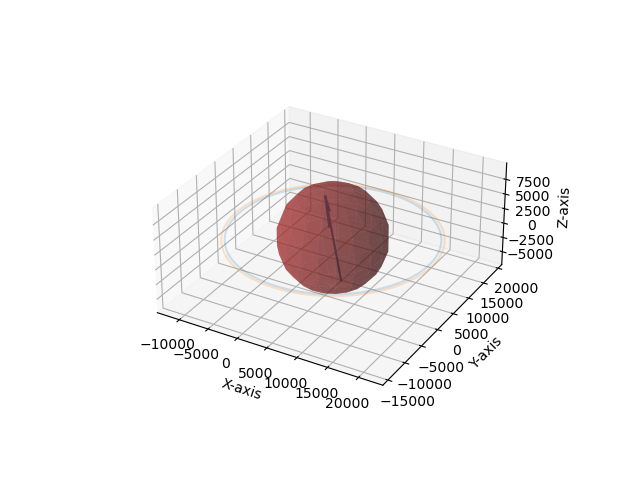

In [24]:
Eros = Asteroid(8420,6.687*(10**15),position=np.array([5000,2400,1500]),axis=np.array([-1.5,2,0.4]),period=316.2)
r1 = Rotation('x',0) #45
r2 = Rotation('z',0) #30
r3 = Rotation('x',0) #15
r4 = Rotation('y',0) #45
R1 = [r1,r2]
R2 = [r3,r4]
sat1.DefineOrbit(Orbit(Eros.GeoRadius,Rotations=R1))
sat2.DefineOrbit(Orbit(Eros.GeoRadius+500,Rotations=R2))
ax,fig = Eros.PlotAsteroid(PlotAxis=True)
ax,fig = Eros.PlotSatelliteOrbit(sat1,ax,fig,PlotInitialPosition=False)
ax,fig = Eros.PlotSatelliteOrbit(sat2,ax,fig,PlotInitialPosition=False)

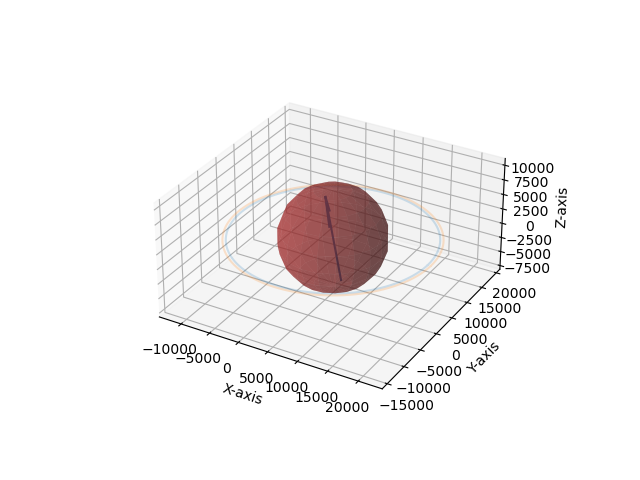

In [25]:
OrbitValues1 = sat1.Orbit.GetOrbitValues()
OrbitResolution1 = sat1.Orbit.PeriodResolution
OrbitValues2 = sat2.Orbit.GetOrbitValues()
OrbitResolution2 = sat2.Orbit.PeriodResolution
SAVE_IMG = False
X0 = Eros.Position[0]
Y0 = Eros.Position[1]
Z0 = Eros.Position[2]
count=0
for t in range(0,25000,100):
    index1 = int(t/OrbitResolution1)%360
    index2 = int(t/OrbitResolution2)%360
    X1 = OrbitValues1[index1][0]
    Y1 = OrbitValues1[index1][1]
    Z1 = OrbitValues1[index1][2]
    X2 = OrbitValues2[index2][0]
    Y2 = OrbitValues2[index2][1]
    Z2 = OrbitValues2[index2][2]
    scat_plot = ax.scatter([X0+X1,X0+X2],[Y0+Y1,Y0+Y2],[Z0+Z1,Z0+Z2],marker='o',c=['black','blue'])
    ax.set_aspect('equal',anchor='C')
    if SAVE_IMG == True:
        plt.savefig(im_path+str(count)+".png")
        count+=1
    scat_plot.remove()
plt.show()

if SAVE_IMG == True:
    images = []
    for filename in range(0,600):
        images.append(imageio.imread(im_path + str(filename)+".png"))
    imageio.mimsave(im_path + 'time_orbit5.gif', images)